In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Variables del sistema

R = 5
a = 3
epsilon = 0.7
P = 3.

def PotencialAdentro(x,y):
    cte = 2*np.pi**2*P/(x**2+y**2)

    pot = cte*(a**2-R**2)*y
    return pot

def PotencialAfuera(x,y):
    cte = 2*np.pi**2*P/(x**2+y**2)
    pot = cte*(a**2)*(1-R**2/(x**2+y**2))*y

    return pot

def CampoAdentro(x,y):
    cte = 2*np.pi**2*P*(a**2-R**2)
    Ex = cte*(  (x*y)/((np.sqrt(x**2+y**2)**3)*R**2) -    (x*y)/(np.sqrt(x**2+y**2      )*R**2))
    Ey = cte*(  (x**2)/(np.sqrt(x**2+y**2)*R**2)  -       (y**2)/(np.sqrt(x**2+y**2)**3 )*R**2)
    return Ex, Ey

def CampoAfuera(x,y):
    cte = 2*np.pi**2*P*a**2
    Ex = cte*(  ( 1/np.sqrt(x**2+y**2) + (R**2)/np.sqrt(x**2+y**2)**4  )*x**2 + (1/np.sqrt(x**2+y**2) - R/np.sqrt(x**2+y**2)**2     )*x*y   )
    Ey = -cte*( ( 1/np.sqrt(x**2+y**2) + (R**2)/np.sqrt(x**2+y**2)**4  )*x*y +   (1/np.sqrt(x**2+y**2) - R/np.sqrt(x**2+y**2)**2     )*x**2   )
    return Ex,Ey

In [18]:
## Crear la grilla para plotear las equipotenciales y el campo eléctrico

xs = np.linspace(-R,R,100)
ys = np.linspace(-R,R,100)

x_mesh , y_mesh = np.meshgrid(xs,ys)

potencial_dentro_mesh = PotencialAdentro(x_mesh,y_mesh)
potencial_afuera_mesh = PotencialAfuera(x_mesh,y_mesh)

Ex, Ey = CampoAdentro(x_mesh,y_mesh)
Ex2, Ey2 = CampoAfuera(x_mesh,y_mesh)

region_afuera = np.sqrt(x_mesh**2+y_mesh**2) > a
region_exterior = np.sqrt(x_mesh**2+y_mesh**2) > R
region_adentro = np.sqrt(x_mesh**2+y_mesh**2) < a

Ex = np.ma.array( Ex , mask = region_afuera)
Ey = np.ma.array( Ey , mask = region_afuera)
Ex2 = np.ma.array( Ex2 , mask = region_adentro)
Ey2 = np.ma.array( Ey2 , mask = region_adentro)
Ex2 = np.ma.array( Ex2 , mask = region_exterior)
Ey2 = np.ma.array( Ey2 , mask = region_exterior)

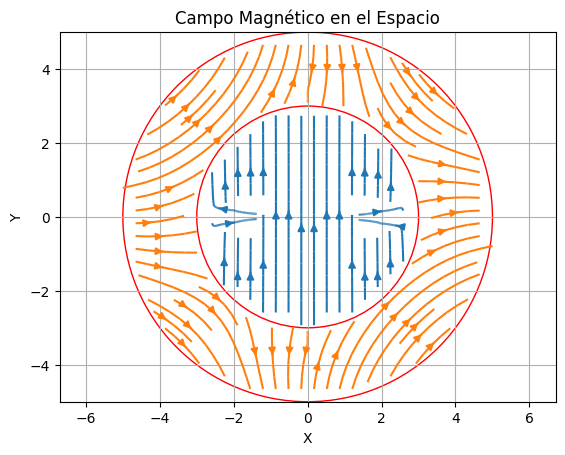

In [23]:
plt.streamplot(x_mesh,y_mesh,Ex,Ey)
plt.streamplot(x_mesh,y_mesh,Ex2,Ey2)

borde = plt.Circle( (0,0), a , color= "red", fill = False )
plt.gca().add_patch(borde)
borde = plt.Circle( (0,0), R , color= "red", fill = False )
plt.gca().add_patch(borde)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Campo Electrico en el Espacio')
plt.grid(True)
plt.axis('equal') 
plt.show()